In [1]:
import pandas as pd

df=pd.read_csv('d:/data/ozone/ozone2.csv')

df.columns

Index(['Solar.R', 'Wind', 'Temp', 'Ozone', 'Result'], dtype='object')

In [2]:
df.head()


,Solar.R,Wind,Temp,Ozone,Result
0,190.000000,7.4,67,41.00000,0
1,118.000000,8.0,72,36.00000,0
2,149.000000,12.6,74,12.00000,0
3,313.000000,11.5,62,18.00000,0
4,185.931507,14.3,56,42.12931,1


In [3]:
df.groupby('Result').mean() # 오존량 분류를 기준으로 한 평균값들

,Solar.R,Wind,Temp,Ozone
Result,,,,
0,166.302702,11.270833,72.652778,20.902778
1,203.379334,8.790123,82.530864,60.997339


In [4]:
df['Result'].value_counts()

1    81
0    72
Name: Result, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

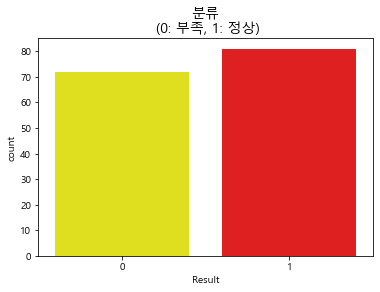

In [5]:
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
import seaborn as sns

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

colors=['yellow','red']

sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)
# 불균형 데이터셋

In [6]:
train_cols=df.columns[:-2]
X=df[train_cols]
y=df['Result']

In [7]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample, columns=['Result'])
df_samp=pd.concat([X_samp, y_samp], axis=1)

In [8]:
df_samp['Result'].value_counts()

0    72
1    72
Name: Result, dtype: int64

In [9]:
X=X_samp[train_cols]
y=y_samp['Result']

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


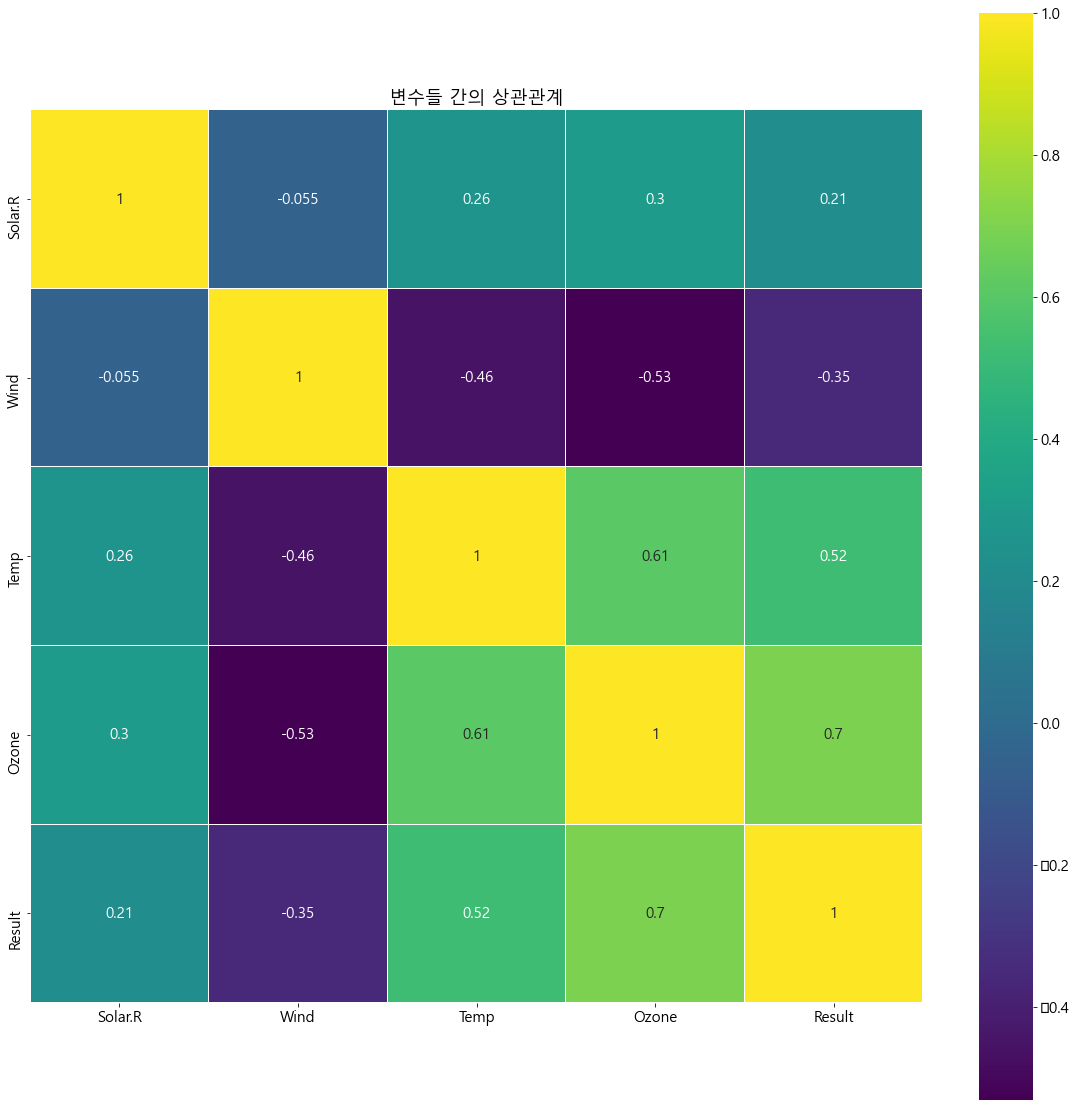

In [10]:
# 상관계수 행렬 그래프
plt.figure(figsize=(20,20))
plt.rc('font', size=15)
sns.heatmap(df.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor='white')
plt.title('변수들 간의 상관관계')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
# 데이터셋 구분
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.2, random_state=7)

In [12]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense

model=Sequential() # 모델 구성
# 노드 개수, 독립변수 개수, 활성화함수 relu
model.add(Dense(128,input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid : 0.0 ~ 1.0
model.compile(loss='mse', optimizer='adam', metrics=['accuracy']) # 모델 학습과정 설정

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_train_scaled=X_train
X_test_scaled=X_test

In [16]:
hist=model.fit(X_train_scaled, y_train, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 1s 4ms/step - loss: 0.4254 - accuracy: 0.5217
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4659 - accuracy: 0.5043
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4868 - accuracy: 0.5043
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4400 - accuracy: 0.5043
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2934 - accuracy: 0.6261
Epoch 6/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2908 - accuracy: 0.6522
Epoch 7/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2783 - accuracy: 0.6696
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2624 - accuracy: 0.6522
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2357 - accuracy: 0.6870
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2457 - accuracy: 0.6783
Epoch 11/1000
4/4 [

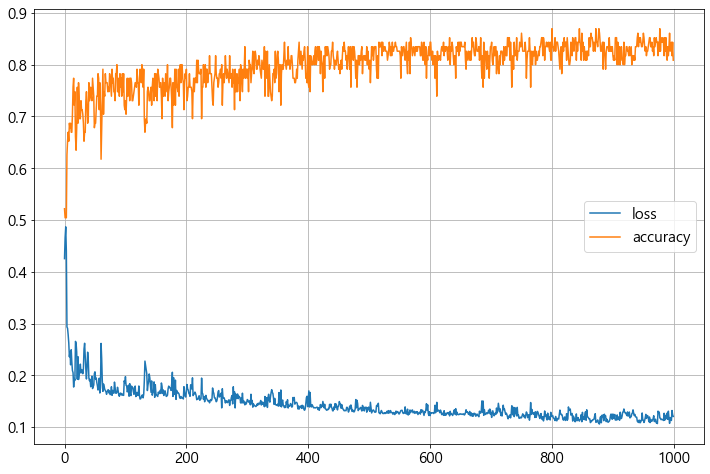

In [17]:
# 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 학습용 데이터셋의 손실률
plt.plot(hist.history['accuracy']) # 학습용 데이터셋의 정확도
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [18]:
# 모델 평가
scores=model.evaluate(X_train_scaled, y_train)
print(scores)
print('%s : %.2f%%' %(model.metrics_names[1], scores[1]*100)) # 학습용
scores=model.evaluate(X_test_scaled, y_test)
print(scores)
print('%s : %.2f%%' %(model.metrics_names[1], scores[1]*100)) # 검증용

4/4 [==============================] - 0s 3ms/step - loss: 0.1240 - accuracy: 0.8174
[0.12396299839019775, 0.8173912763595581]
accuracy : 81.74%
1/1 [==============================] - 0s 22ms/step - loss: 0.2240 - accuracy: 0.7241
[0.22396144270896912, 0.7241379022598267]
accuracy : 72.41%


In [19]:
# 새로운 값 예측
test_set=[[25,10.8,71]] # 일조량 25, 풍량 10.8, 화씨온도 71도일 때의 오존량
print(model.predict(test_set))
test_set=[[255,4.3,90]] # 일조량 255, 풍량 4.3, 화씨온도 90도일 때의 오존량
print(model.predict(test_set))

[[5.780648e-09]]
[[0.99125636]]


In [20]:
model.save('d:/data/ozone/ozone_keras.model')
model.save_weights('d:/data/ozone/ozone.weight')

INFO:tensorflow:Assets written to: d:/data/ozone/ozone_keras.model\assets
